<a href="https://colab.research.google.com/github/manmeet1049/Data-Science/blob/main/cnn_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import numpy as np

In [2]:
(X_train,Y_train),(X_test,Y_test)= datasets.cifar10.load_data()

In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
X_train.shape,X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [5]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

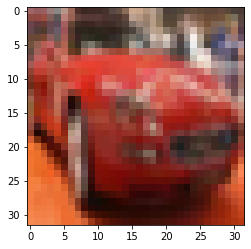

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[5])

In [7]:
Y_train.shape


(50000, 1)

In [8]:
Y_train=Y_train.reshape(-1,)

In [9]:
Y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [10]:
X_train=X_train/255
X_test=X_test/255

In [11]:
X_train[:5]

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [12]:
cnn=models.Sequential([
                       #cnn layers:
                       layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
                       layers.MaxPooling2D((2,2)),
                       layers.Conv2D(filters=64,activation='relu',kernel_size=(3,3)),
                       layers.MaxPooling2D((2,2)),

                       #dense layers:
                       layers.Flatten(),
                       layers.Dense(64,activation='relu'),
                       layers.Dense(10,activation='softmax')

])


In [13]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [14]:
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
# with tf.device('/gpu:0'):
cnn.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 19s 6ms/step - loss: 1.4558 - accuracy: 0.4782
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1003 - accuracy: 0.6121
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9714 - accuracy: 0.6647
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8825 - accuracy: 0.6940
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8196 - accuracy: 0.7162
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7633 - accuracy: 0.7331
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7069 - accuracy: 0.7547
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6624 - accuracy: 0.7696
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6203 - accuracy: 0.7844
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.58

In [16]:
cnn.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9715 - accuracy: 0.6967


[0.9714926481246948, 0.6966999769210815]